# Agrupación de datos

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Agregación de datos por categoría

In [4]:
gender = ('Male', 'Female')
income = ('Poor', 'Middle Class', 'Rich') # Nivel de ingresos

In [5]:
n = 500
gender_data = []
income_data = []

for i in range(0, 500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [6]:
# Z -> N(0,1)
# N(m,s) -> m + s * >
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.rand(n)

In [7]:
data = pd.DataFrame(
    {
        'Gender' : gender_data,
        'Economic Status' : income_data,
        'Height' : height,
        'Weight' : weight,
        'Age' : age,
        'Income' : income
    }
)

In [8]:
data.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Poor,162.741308,15.009735,38.391042,20789.950252
1,Female,Poor,166.051831,55.192639,22.404734,18604.433181
2,Female,Middle Class,114.984160,34.866077,22.875945,21480.505941
3,Male,Middle Class,157.256101,20.046422,43.607325,20821.045617
4,Male,Poor,159.044562,63.104907,41.931960,18468.900229
5,Female,Rich,165.783987,5.804551,21.154363,18497.155895
6,Male,Poor,120.111099,40.240922,37.048696,18917.473308
7,Male,Middle Class,189.279379,70.824304,8.166050,19595.566084
8,Male,Middle Class,129.065760,46.790035,38.709516,19341.551313
9,Female,Middle Class,179.681619,59.252239,38.279161,20896.494282


Las edades quizás habría que truncarlas para que sean enteros y las alturas habría que tener en cuenta que nos interesa, y dependiendo deberemos modificar la desviación típica y la media. Así, con todas las columnas. Los ingresos también pueden tener poco sentido, porque puede haber una persona de clase media que cobre menos que una persona, lo cual es incongruente.

## Agrupación de datos

In [9]:
grouped_gender = data.groupby('Gender')

### Obtener los dos grupos

In [10]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height     Weight        Age        Income
1    Female            Poor  166.051831  55.192639  22.404734  18604.433181
2    Female    Middle Class  114.984160  34.866077  22.875945  21480.505941
5    Female            Rich  165.783987   5.804551  21.154363  18497.155895
9    Female    Middle Class  179.681619  59.252239  38.279161  20896.494282
12   Female    Middle Class  176.999256  66.955777  22.831297  21352.850943
..      ...             ...         ...        ...        ...           ...
491  Female    Middle Class  135.924244  77.464789  32.667099  19642.194177
493  Female    Middle Class  183.576536  98.219921  23.232891  20237.024463
495  Female            Rich  147.959698  78.244676  29.006713  19054.399199
497  Female    Middle Class  157.794535  59.243183  22.162579  20748.427140
498  Female    Middle Class  216.601049  84.901687  10.192493  18227.548012

[256 rows x 6 columns]
Male
    Gender Economic Status      Height     Weight   

### Obtener solo un grupo

In [11]:
grouped_gender.get_group('Female')

,Gender,Economic Status,Height,Weight,Age,Income
1,Female,Poor,166.051831,55.192639,22.404734,18604.433181
2,Female,Middle Class,114.984160,34.866077,22.875945,21480.505941
5,Female,Rich,165.783987,5.804551,21.154363,18497.155895
9,Female,Middle Class,179.681619,59.252239,38.279161,20896.494282
12,Female,Middle Class,176.999256,66.955777,22.831297,21352.850943
...,...,...,...,...,...,...
491,Female,Middle Class,135.924244,77.464789,32.667099,19642.194177
493,Female,Middle Class,183.576536,98.219921,23.232891,20237.024463
495,Female,Rich,147.959698,78.244676,29.006713,19054.399199
497,Female,Middle Class,157.794535,59.243183,22.162579,20748.427140


### Doble agrupación

In [12]:
double_group = data.groupby(['Gender', 'Economic Status'])

In [13]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height      Weight        Age        Income
2    Female    Middle Class  114.984160   34.866077  22.875945  21480.505941
9    Female    Middle Class  179.681619   59.252239  38.279161  20896.494282
12   Female    Middle Class  176.999256   66.955777  22.831297  21352.850943
29   Female    Middle Class  222.658854   98.250618  21.872729  20218.818915
31   Female    Middle Class  128.356403   74.436037  30.639693  19437.595973
..      ...             ...         ...         ...        ...           ...
489  Female    Middle Class  183.591129  114.345528  27.453862  18934.747429
491  Female    Middle Class  135.924244   77.464789  32.667099  19642.194177
493  Female    Middle Class  183.576536   98.219921  23.232891  20237.024463
497  Female    Middle Class  157.794535   59.243183  22.162579  20748.427140
498  Female    Middle Class  216.601049   84.901687  10.192493  18227.548012

[90 rows x 6 columns]
('Female', 'Poor')
     Ge

## Operaciones sobre datos agrupados

In [14]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     14361.980068  5847.430996  2657.956286  1.790207e+06
       Poor             12131.208244  4665.039087  2433.251848  1.531365e+06
       Rich             14303.881090  5594.586313  2677.337633  1.749857e+06
Male   Middle Class     10230.668600  4002.441107  1873.058895  1.288917e+06
       Poor             15140.955341  6398.814513  2965.271924  1.890832e+06
       Rich             13274.135394  5374.954010  2474.187886  1.678437e+06

In [15]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     159.577556  64.971456  29.532848  19891.191064
       Poor             157.548159  60.584923  31.600673  19887.857453
       Rich             160.717765  62.860520  30.082445  19661.318758
Male   Middle Class     157.394902  61.576017  28.816291  19829.485851
       Poor             159.378477  67.355942  31.213389  19903.498228
       Rich             158.025421  63.987548  29.454618  19981.388932

In [16]:
double_group.size()

Gender  Economic Status
Female  Middle Class       90
        Poor               77
        Rich               89
Male    Middle Class       65
        Poor               95
        Rich               84
dtype: int64

In [17]:
double_group.describe()

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Female Middle Class      90.0  159.577556  28.583235   89.998186  137.319299   
       Poor              77.0  157.548159  26.088561  103.898142  137.272247   
       Rich              89.0  160.717765  29.715635   94.803244  142.289090   
Male   Middle Class      65.0  157.394902  31.910052   96.205727  131.441641   
       Poor              95.0  159.378477  30.535200   90.111634  137.723877   
       Rich              84.0  158.025421  30.448174   94.976644  138.416783   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     159.589514  176.988127  224.311800   90.0  64.971456   
       Poor             159.161004  174.935474  218.271532   77.0  60.584923   
       Rich             161.975243  182.599293  215.726461   89.0  62.860520   
Male   Middle Class     159.348986  175.385681  260.484202   65.0  61.576017   
       Poor             156.958912  181.809468  225.449843   95.0  67.355942   
       Rich             157.395314  179.392632  230.400359   84.0  63.987548   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Middle Class     ...  38.278154  61.120203   90.0  19891.191064   
       Poor             ...  39.458774  56.639298   77.0  19887.857453   
       Rich             ...  38.148414  52.679680   89.0  19661.318758   
Male   Middle Class     ...  38.498514  59.630448   65.0  19829.485851   
       Poor             ...  38.576751  65.457589   95.0  19903.498228   
       Rich             ...  36.876380  51.625757   84.0  19981.388932   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Female Middle Class     1000.940545  18002.821593  19229.622281  19871.843425   
       Poor             1053.301623  18001.250399  18934.027963  20035.325602   
       Rich             1016.111582  18002.879697  18812.713664  19624.881431   
Male   Middle Class     1030.018019  18096.818256  18984.872512  19848.224896   
       Poor             1028.881852  18027.518442  18952.976302  20214.500053   
       Rich              991.041572  18013.369904  19278.405096  19953.328461   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20766.334628  21480.505941  
       Poor             20881.780287  21499.176583  
       Rich             20486.331612  21461.258884  
Male   Middle Class     20762.801739  21487.836501  
       Poor             20725.419005  21484.135923  
       Rich             21009.762533  21467.170751  

[6 rows x 32 columns]

In [18]:
double_group['Income'].describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      90.0  19891.191064  1000.940545  18002.821593   
       Poor              77.0  19887.857453  1053.301623  18001.250399   
       Rich              89.0  19661.318758  1016.111582  18002.879697   
Male   Middle Class      65.0  19829.485851  1030.018019  18096.818256   
       Poor              95.0  19903.498228  1028.881852  18027.518442   
       Rich              84.0  19981.388932   991.041572  18013.369904   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     19229.622281  19871.843425  20766.334628  21480.505941  
       Poor             18934.027963  20035.325602  20881.780287  21499.176583  
       Rich             18812.713664  19624.881431  20486.331612  21461.258884  
Male   Middle Class     18984.872512  19848.224896  20762.801739  21487.836501  
       Poor             18952.976302  20214.500053  20725.419005  21484.135923  
       Rich             19278.405096  19953.328461  21009.762533  21467.170751

### Operaciones de agregación

In [22]:
double_group.aggregate(
    {
        "Income" : np.sum,
        "Age" : np.mean,
        "Height" : np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.790207e+06  29.532848  28.583235
       Poor             1.531365e+06  31.600673  26.088561
       Rich             1.749857e+06  30.082445  29.715635
Male   Middle Class     1.288917e+06  28.816291  31.910052
       Poor             1.890832e+06  31.213389  30.535200
       Rich             1.678437e+06  29.454618  30.448174

In [24]:
double_group.aggregate(
    {
        "Age" : np.mean,
        "Height" : lambda h:(np.mean(h)/np.std(h)) # tipificacion
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     29.532848  5.614184
       Poor             31.600673  6.078575
       Rich             30.082445  5.439169
Male   Middle Class     28.816291  4.970841
       Poor             31.213389  5.247190
       Rich             29.454618  5.221152

In [26]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     14361.980068  159.577556  28.583235  5847.430996   
       Poor             12131.208244  157.548159  26.088561  4665.039087   
       Rich             14303.881090  160.717765  29.715635  5594.586313   
Male   Middle Class     10230.668600  157.394902  31.910052  4002.441107   
       Poor             15140.955341  159.378477  30.535200  6398.814513   
       Rich             13274.135394  158.025421  30.448174  5374.954010   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     64.971456  27.305165  2657.956286  29.532848   
       Poor             60.584923  26.178449  2433.251848  31.600673   
       Rich             62.860520  25.874248  2677.337633  30.082445   
Male   Middle Class     61.576017  23.189865  1873.058895  28.816291   
       Poor             67.355942  26.075631  2965.271924  31.213389   
       Rich             63.987548  26.050591  2474.187886  29.454618   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     12.761027  1.790207e+06  19891.191064  1000.940545  
       Poor             12.299335  1.531365e+06  19887.857453  1053.301623  
       Rich             11.228165  1.749857e+06  19661.318758  1016.111582  
Male   Middle Class     11.635436  1.288917e+06  19829.485851  1030.018019  
       Poor             13.286752  1.890832e+06  19903.498228  1028.881852  
       Rich             11.243533  1.678437e+06  19981.388932   991.041572

In [28]:
double_group.aggregate([lambda x: np.mean(x) / np.std(x)]) # tipificación de todas las columnas

Height    Weight       Age     Income
                        <lambda>  <lambda>  <lambda>   <lambda>
Gender Economic Status                                         
Female Middle Class     5.614184  2.392787  2.327266  19.983831
       Poor             6.078575  2.329481  2.586147  19.005260
       Rich             5.439169  2.443227  2.694375  19.459197
Male   Middle Class     4.970841  2.675963  2.495871  19.401411
       Poor             5.247190  2.596803  2.361674  19.447411
       Rich             5.221152  2.471033  2.635428  20.283103

## Filtrado de datos

### Filtrar grupos de edad cuya suma supera los 2400

In [29]:
double_group['Age'].filter(lambda x: x.sum() > 2400) # devuelve los elementos

0      38.391042
1      22.404734
2      22.875945
4      41.931960
5      21.154363
         ...    
495    29.006713
496    41.227035
497    22.162579
498    10.192493
499    23.483843
Name: Age, Length: 435, dtype: float64

## Transformación de variables

### Unidad tipificada 
[Más info](https://es.wikipedia.org/wiki/Unidad_tipificada)

In [30]:
zscore = lambda x : (x - x.mean()) / x.std()

(array([  1.,   4.,  17.,  47.,  90., 127., 103.,  69.,  36.,   6.]),
 array([-3.58238233, -2.95931382, -2.33624531, -1.7131768 , -1.09010829,
        -0.46703978,  0.15602873,  0.77909724,  1.40216575,  2.02523426,
         2.64830277]),
 <a list of 10 Patch objects>)

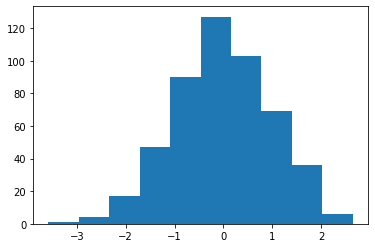

In [38]:
z_group = double_group.transform(zscore) # datos normalizados
plt.hist(z_group['Age'])

### Reemplazar NaN

In [40]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [41]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,162.741308,15.009735,38.391042,20789.950252
1,166.051831,55.192639,22.404734,18604.433181
2,114.984160,34.866077,22.875945,21480.505941
3,157.256101,20.046422,43.607325,20821.045617
4,159.044562,63.104907,41.931960,18468.900229
...,...,...,...,...
495,147.959698,78.244676,29.006713,19054.399199
496,196.442207,36.212842,41.227035,19275.683331
497,157.794535,59.243183,22.162579,20748.427140
498,216.601049,84.901687,10.192493,18227.548012


En este caso no hay NaNs porque es un Dummy DataFrame

## Otras operaciones

### Obtener una determinada fila

In [42]:
double_group.head(1) # primera fila de cada uno de los grupos

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Poor,162.741308,15.009735,38.391042,20789.950252
1,Female,Poor,166.051831,55.192639,22.404734,18604.433181
2,Female,Middle Class,114.984160,34.866077,22.875945,21480.505941
3,Male,Middle Class,157.256101,20.046422,43.607325,20821.045617
5,Female,Rich,165.783987,5.804551,21.154363,18497.155895
11,Male,Rich,180.476262,65.271986,17.240237,18927.636394


In [43]:
double_group.tail(1) # ultima fila de cada uno de los grupos

,Gender,Economic Status,Height,Weight,Age,Income
485,Female,Poor,148.108800,68.205256,33.977284,18010.033108
486,Male,Rich,148.692447,42.962194,39.376972,19722.448831
492,Male,Middle Class,127.700933,44.663853,25.155845,18261.647547
495,Female,Rich,147.959698,78.244676,29.006713,19054.399199
498,Female,Middle Class,216.601049,84.901687,10.192493,18227.548012
499,Male,Poor,220.096520,49.341032,23.483843,18027.518442


In [44]:
double_group.nth(32) # cada uno de los grupos debe tener al menos 32 filas

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     151.166131  89.020692  57.986108  20972.054453
       Poor             206.473727  87.793936  43.442236  21119.346958
       Rich             108.857306  65.621977  47.278021  19200.366359
Male   Middle Class     174.060747  82.032181  31.847971  21031.469370
       Poor             153.871942  47.480839  19.502756  18925.787989
       Rich             171.114309  81.890583  21.223737  19703.031330

### Ordenar por una determinada columna

In [46]:
data_sorted = data.sort_values(['Age','Income'])

In [47]:
data_sorted.groupby('Gender').head()

,Gender,Economic Status,Height,Weight,Age,Income
296,Male,Poor,123.255478,70.331061,-16.384838,20671.228701
276,Female,Poor,180.633069,31.183331,-3.455120,20672.520893
343,Female,Rich,135.678928,96.062215,-1.713753,20163.003977
201,Male,Poor,136.422109,62.456833,-0.559267,21097.722893
207,Male,Poor,156.958912,66.570027,-0.187892,20216.027227
235,Male,Poor,160.518151,52.232326,0.871014,19309.039969
360,Male,Poor,162.609878,79.575592,2.230224,19224.879089
348,Female,Middle Class,163.533033,73.422374,2.514284,21307.108306
168,Female,Middle Class,142.360207,63.445280,5.358839,21063.863762
203,Female,Middle Class,183.088169,27.056138,5.698763,20410.126177


In [48]:
data_sorted.groupby('Gender').head(1) # la mujer y el hombre más jovenes

,Gender,Economic Status,Height,Weight,Age,Income
296,Male,Poor,123.255478,70.331061,-16.384838,20671.228701
276,Female,Poor,180.633069,31.183331,-3.455120,20672.520893


In [49]:
data_sorted.groupby('Gender').tail(1) # la mujer y el hombre más mayores

,Gender,Economic Status,Height,Weight,Age,Income
406,Female,Middle Class,129.307473,91.732146,61.120203,18502.102948
334,Male,Poor,185.453650,88.858791,65.457589,18163.285737


## Conjunto de entrenamiento y testing

In [3]:
data = pd.read_csv('../python-ml-course/datasets/customer-churn-model/Customer Churn Model.txt')

### Dividir utilizando la distribución normal

In [14]:
a = np.random.randn(len(data))
check = (a < 0.8) # 80% training, 20% testing

In [15]:
training = data[check]
testing = data[~check]

### Con la librería sklearn

In [17]:
from sklearn.model_selection import train_test_split # pip install scikit-learn

In [18]:
train, test = train_test_split(data, test_size = 0.2) # igual que antes
print(len(train),len(test))

2666 667


### Usando una función shuffle (aleatorio)

In [19]:
from sklearn.utils import shuffle

In [21]:
data = shuffle(data) # mezclado aleatorio

In [22]:
cut_id = int(0.90*len(data))
train_data = data[:cut_id]
test_data = data[cut_id+1:]